# Bike Sharing Linear Regression Model

In [23]:
#Import the needed Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as am
from datetime import datetime

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

#Ignore future Warnings
import warnings
warnings.filterwarnings('ignore')

#Enable setting to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#Load the dataset
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Analyze the Dataset

df.info (verbose=True,null_counts=True)

#understand the dataset and Identify columns to drop : Duplicate Columns, Null Value, Columns which do not make value
#Inference : No missing Values, dteday field to be convereted to date time field, drop redundant columns yr & mnth

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df.shape

(730, 16)

In [5]:
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [6]:
# Convert dteday to a column value which will be useful for processing
df['dteday'] = pd.to_datetime(df['dteday'])
df['dteday'].dtypes

df['year'] = pd.DatetimeIndex(df["dteday"]).year
df['month'] = pd.DatetimeIndex(df["dteday"]).month
df['date'] = pd.DatetimeIndex(df["dteday"]).day

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
 16  year        730 non-null  

In [8]:
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,date
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1,1
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,2,1


In [9]:
df.drop(['dteday','mnth'],axis=1,inplace=True)

In [10]:
df.describe()

,instant,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,date
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849,2018.500000,6.526027,15.720548
std,210.877136,1.110184,0.500343,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647,0.500343,3.450215,8.802278
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,2018.000000,1.000000,1.000000
25%,183.250000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000,2018.000000,4.000000,8.000000
50%,365.500000,3.000000,0.500000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000,2018.500000,7.000000,16.000000
75%,547.750000,3.000000,1.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000,2019.000000,10.000000,23.000000
max,730.000000,4.000000,1.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,2019.000000,12.000000,31.000000


In [11]:
df.head()

,instant,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,date
0,1,1,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1,1
1,2,1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,2,1
2,3,1,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,3,1
3,4,1,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,4,1
4,5,1,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,5,1


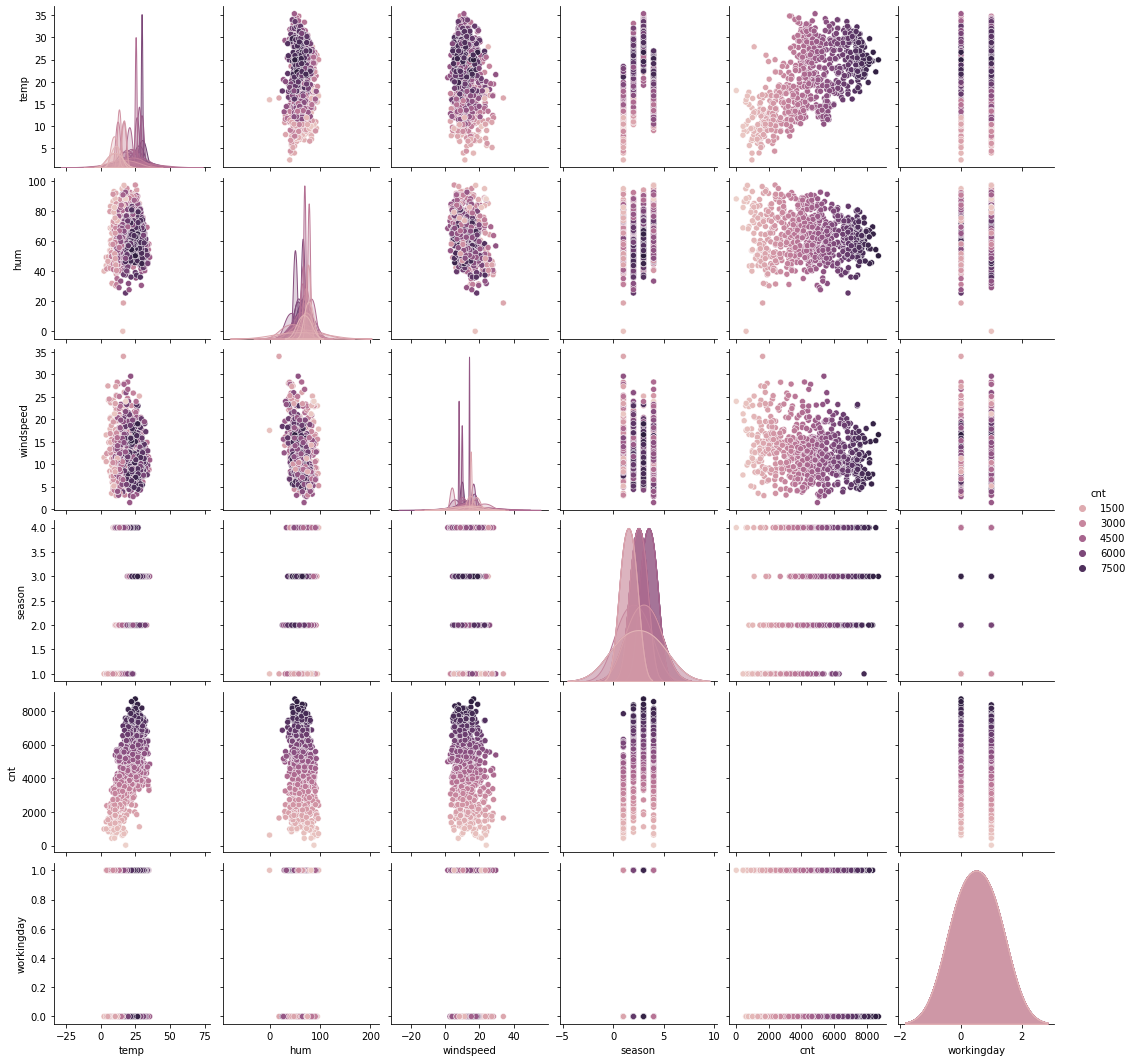

In [12]:
#Visulaize the data

sns.pairplot(
    df,
    x_vars=["temp", "hum","windspeed","season",'cnt',"workingday"],y_vars=["temp", "hum","windspeed","season",'cnt',"workingday"],hue = 'cnt')

<AxesSubplot:xlabel='temp', ylabel='cnt'>

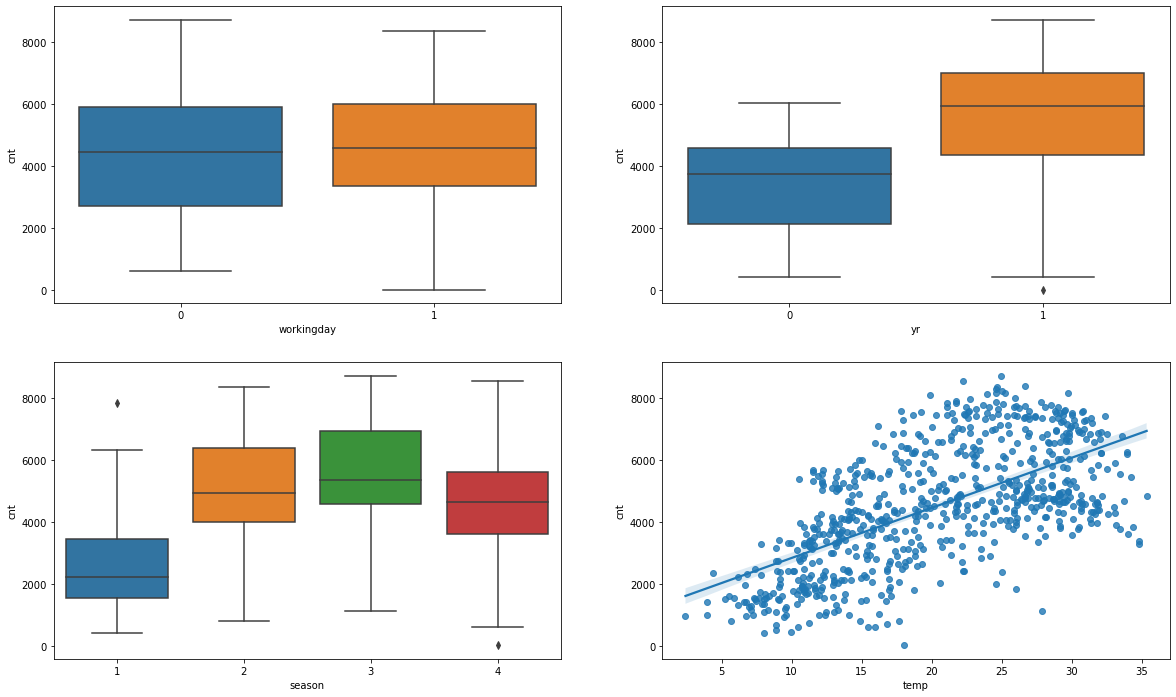

In [36]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
sns.boxplot(x='workingday',y='cnt',data=df)

plt.subplot(2,2,2)
sns.boxplot(x='yr',y='cnt',data=df)

plt.subplot(2,2,3)
sns.boxplot(x='season',y='cnt',data=df)

plt.subplot(2,2,4)
sns.regplot(x='temp',y='cnt',data=df)


In [40]:
#split the Data between Train and Test data for modelling
dx_train,dx_test=train_test_split(df,train_size=0.7,random_state=100)
dx_train.head()

,instant,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,date
576,577,3,1,0,2,1,1,29.246653,33.1448,70.4167,11.083475,968,6248,7216,2019,7,31
426,427,1,1,0,6,0,2,16.980847,20.6746,62.1250,10.792293,956,3110,4066,2019,3,3
728,729,1,1,0,0,0,1,10.489153,11.5850,48.3333,23.500518,364,1432,1796,2019,12,30
482,483,2,1,0,6,0,2,15.443347,18.8752,48.9583,8.708325,1120,3100,4220,2019,4,28
111,112,2,0,0,5,1,2,13.803347,16.0977,72.9583,14.707907,177,1506,1683,2018,4,22


In [41]:
dx_train.shape

(510, 17)

In [39]:
dx_test.shape

(220, 17)